## Полезные задачки для дальнейшей работы с искусственными нейронными сетями

## Работа с изображениями

Все изображения представляют собой матрицы чисел (или многомерные векторы), которые кодируют цвета отдельных пикселей. Для изображений высоты $H$, ширины $W$ с $C$ цветовыми каналами получаем упорядоченный набор  $H \times W \times C$ чисел.

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/img_to_array.png" width="1000" >

Например, датасет CIFAR-10 содержит цветные (трехцветные) изображения размером $32 \times 32$ пикселя. Таким образом, каждое изображение из датасета является точкой в $3072$-мерном ($32 \times 32 \times 3 = 3072$) вещественном пространстве.

То есть все изображения по сути являются векторами, заполненными числами. В python есть несколько бибилиотек, которые отвечают за работу с векторами. Самыми часто используемыми для нейронных сетей -- библиотеки numpy и PyTorch.

Посмотрим на одну из цифр из набора данных MNIST, как её видим мы:

In [ ]:
import numpy as np
from PIL import Image
from torchvision import utils
import matplotlib.pyplot as plt

image = Image.open("assets/digit.png")
img_np = np.array(image)
plt.imshow(img_np, cmap="gray")
plt.show()

FileNotFoundError: ignored

И как она записана в компьютере -- в виде набора векторов (матрицы):

In [ ]:
print(img_np)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12  15  20  12   1   0   0   0]
 [  0   0   0   0   0   0   3 123 225 242 255 225 137   7   0   0]
 [  0   0   0   0   0  15 207 251 103 109 107 105 171 145   0   0]
 [  0   0   0   0   0 149 236  80   0   0   0   0   4  21   0   0]
 [  0   0   0   0  16 228 106   0  17  33  17   0   0   0   0   0]
 [  0   0   0   0  97 248  98 138 232 255 216  22   0   0   0   0]
 [  0   0   0   0  50 247 255 197 111 123 252 129   0   0   0   0]
 [  0   0   0   0   1  54  55   9   0  49 250 116   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 158 240  44   0   0   0   0]
 [  0   0   0   0   0   0   0   0  88 255 125   0   0   0   0   0]
 [  0   0   0   0   7  15  23 132 255 188  12   0   0   0   0   0]
 [  0   0   0   0  20 200 229 240 157  28   0   0   0   0   0   0]
 [  0   0   0   0   3  64  73  45   0   0   0   0   0   0   0 

Подключить библиотеки numpy (для более короткой записи кода и простоты её полное название сокращают до np) и torch, чтобы обеспечить работу с векторами:

In [ ]:
import numpy as np
import torch

Рассмотрим основные операции для работы с тензорами.
Создать экземпляр класса [Tensor](https://pytorch.org/docs/stable/tensors.html#torch.Tensor).
Определение из документации: A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

In [ ]:
e = torch.tensor([])
e

tensor([])

Записать вектор [1.1, 2.2, 3.2] в виде тензора и вывести его тип при помощи функции type.

In [ ]:
a = torch.tensor( [1.1, 2.2, 3.2])
type(a)

torch.Tensor

Вопрос: чем принципиально отличаются записи a = torch.Tensor() и b = torch.tensor()? Что будет на выходе для a и для b?

In [ ]:
a = torch.Tensor()
print('a: ', a)
b = torch.tensor([])
print("b: ", b)

a:  tensor([])
b:  tensor([])


torch.Tensor is an alias for the default tensor type (torch.FloatTensor).  
То есть torch.Tensor = torch.tensor([], dtype = torch.float64)


Создать тензор [1.1, 2.2, 3.2] указанного типа float64. Использовать параметр dtype:

In [ ]:
a = torch.tensor( [1.1, 2.2, 3.2] , dtype = torch.float64)
a

tensor([1.1000, 2.2000, 3.2000], dtype=torch.float64)

Записать вектор [1.1, 2.2, 3.2] в виде тензора и вывести тип данных, которые помещены в тензор. Для этого так же использовать dtype.

In [ ]:
a = torch.tensor([1.1, 2.2, 3.2], dtype =  torch.float64)
a.dtype

torch.float64

Создать вектор размерности $3 \times 2$ и заполнить его указанным значением 2.5.

In [ ]:
a = torch.ones(3, 2) * 2.5
a

tensor([[2.5000, 2.5000],
        [2.5000, 2.5000],
        [2.5000, 2.5000]])

Создать тензор размерности $3 \times 2$ и заполнить его единицами.

In [ ]:
a = torch.ones(3,2)
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Создать тензор размерности $2 \times 3 \times 4$ и заполнить его нулями.

In [ ]:
b = torch.zeros(2, 3, 4)
b

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Создать тензор размерности 3 строки и 4 стоблца, заполненный случайными числами.

In [ ]:
x = torch.randn(3, 4)
x

tensor([[ 1.3125,  0.0473, -1.6900,  1.1617],
        [ 0.8704, -0.4100, -0.4080,  1.3558],
        [ 0.4948, -0.9668,  2.5753, -0.0386]])

Создать тензор - вектор размерности $1 \times 5$, заполненный целыми случайными числами от 0 до 100.

In [ ]:
y = torch.randint(0, 101, (1, 5))
print(y)

tensor([[80, 32, 42, 80, 89]])


Создать вектор размерности $2 \times 3$ и заполнить его целыми числами от -10 до 10.

In [ ]:
a = torch.randint(-10, 11, (2, 3))
a

tensor([[  6,  -3,  -2],
        [ -7, -10,  -7]])

Для того, чтобы все величины, которые мы создаём при помощи датчика случайных чисел, создались один раз и не изменяли своего значения, надо зафиксировать базовое число --- это делается при помощи функции torch.manual_seed().
Функция torch.randn_like(x) возвращает тензор того же размера, что и x, который заполнен случайными числами из нормального распределения со средним 0 и дисперсией 1.

In [ ]:
torch.manual_seed(7)
a = torch.randn(1, 5)
b = torch.randn_like(a)
print(f'a = {a},\nb = {b}'.format(a, b))

a = tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]]),
b = tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])


Создать вектор размерности $3 \times 2$ и заполнить его указанным значением 2.5.

In [ ]:
a = torch.ones(3, 2) * 2.5
a

tensor([[2.5000, 2.5000],
        [2.5000, 2.5000],
        [2.5000, 2.5000]])

Для выполнения операций умножения на веса или на матрицы свёрток (для свёрточных нейронных сетей), необходимо вытянуть матрицу, которой представлено изображение:

In [ ]:
import matplotlib.pyplot as plt

NameError: ignored

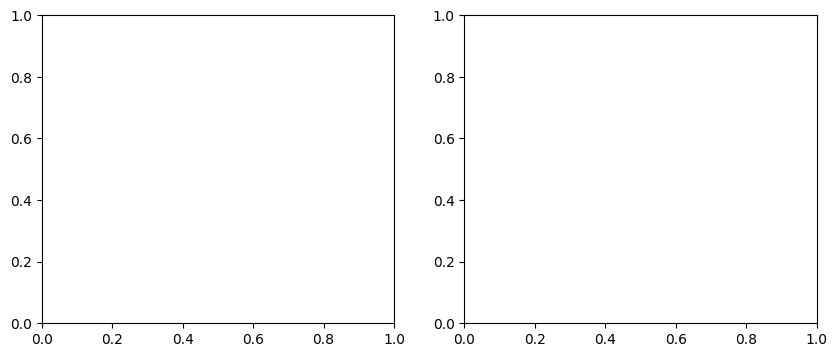

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].imshow(img_np, cmap="gray")
ax[1].imshow(img_np.reshape(1, -1), aspect=20, cmap="gray")
ax[0].set_title("Original image")
ax[1].set_title("Flattened image")

vector = np.array(image).flatten()
print(list(vector))

Вытянуть тензор в одну линию можно при помощи функции flatten:

In [ ]:
t = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(t.shape)
print(torch.flatten(t))

torch.Size([2, 2, 2])
tensor([1, 2, 3, 4, 5, 6, 7, 8])


Можно добавить в функцию flatten параметры, показывающие, с какого измерение по какое спрямлять тензор:

In [ ]:
t_new = torch.flatten(t, start_dim=0, end_dim=1)
print(t_new, t_new.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]) torch.Size([4, 2])


Ещё есть возможность, позволяющая представить вектор x в виде одномерного вектора (вытянуть в линию и в столбик все значения x) при помощи функции view:

In [ ]:
x_row = x.view(-1, 12)
x_column = x.view(12, -1)
print(x_row,'\n',x_column)

tensor([[ 1.3125,  0.0473, -1.6900,  1.1617,  0.8704, -0.4100, -0.4080,  1.3558,
          0.4948, -0.9668,  2.5753, -0.0386]]) 
 tensor([[ 1.3125],
        [ 0.0473],
        [-1.6900],
        [ 1.1617],
        [ 0.8704],
        [-0.4100],
        [-0.4080],
        [ 1.3558],
        [ 0.4948],
        [-0.9668],
        [ 2.5753],
        [-0.0386]])


В целом функция view может поменять форму тензора на любую допустимую. Изменить форму вектора x на $2 \times 6$.


In [ ]:
x = torch.randn(2,6)
x

tensor([[-0.8540,  0.3594, -0.8373,  0.1076, -1.3151, -1.5009],
        [-0.1848,  0.6248, -1.1820, -0.1696,  0.5399, -1.4019]])

## Операции умножения внутри нейрона

Модель нейрона взята из биологии и структура повторяет процесс передачи информации через нейрон. Входной сигнал обрабатывается и дальше принимается решение, насколько он важен и передавать ли его дальше.

<img src ="https://upload.wikimedia.org/wikipedia/commons/b/b5/Neuron.svg" width="1000" >


Та же логика ипользовалась при создании модели искусственного нейрона: входные данные умножаются на веса, передаются функции активации, которая их преобразует и передаёт дальше:

https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w02/terms.html

При перемножении заданных значений на веса необходимо использовать векторное произведение.
Создать два тензора размера $2 \times 3$ и $3 \times 5$ и векторно перемножить их. Вывести на экран результирующий тензор и его размерность.

In [ ]:
a = torch.randn(2, 3)
b = torch.randn(3, 5)
res = torch.matmul(a, b)
print(res,'\n',res.shape)

tensor([[ 0.2623, -1.8250, -2.8797, -3.4866, -1.8352],
        [-2.3204,  0.0316,  1.2511,  0.6834,  3.0207]]) 
 torch.Size([2, 5])


При умножении на веса бывает необходимо транспонировать данные (поменять порядок расположения осей).
Изменить порядок расположения осей тензора x (транспонировать) можно двумя способами: при помощи  метода T и функции transpose().

In [ ]:
a = x.T
print(x)
print(a)
b = torch.transpose(x , 0, 1)
print(b)

tensor([[-0.8540,  0.3594, -0.8373,  0.1076, -1.3151, -1.5009],
        [-0.1848,  0.6248, -1.1820, -0.1696,  0.5399, -1.4019]])
tensor([[-0.8540, -0.1848],
        [ 0.3594,  0.6248],
        [-0.8373, -1.1820],
        [ 0.1076, -0.1696],
        [-1.3151,  0.5399],
        [-1.5009, -1.4019]])
tensor([[-0.8540, -0.1848],
        [ 0.3594,  0.6248],
        [-0.8373, -1.1820],
        [ 0.1076, -0.1696],
        [-1.3151,  0.5399],
        [-1.5009, -1.4019]])


Найти сумму всех элементов тензора a.

In [ ]:
a.sum()

tensor(-5.8139)

Найти сумму всех элементов тензора a по строкам.

In [ ]:
a.sum(dim = 1)

tensor([-1.0388,  0.9842, -2.0193, -0.0620, -0.7752, -2.9028])

Найти сумму всех элементов тензора a по столбцам.

In [ ]:
a.sum(dim = 0)

tensor([-0.3255,  3.6300])

Найти максимальные значения вектора x по столбцам и строкам при помощи функции max.

In [ ]:
rows =  x.max(dim= 1)
columns =   x.max(dim= 0)
print(f"rows:\n {rows}, \ncolumns: \n {columns}".format(rows, columns))

rows:
 torch.return_types.max(
values=tensor([0.3594, 0.6248]),
indices=tensor([1, 1])), 
columns: 
 torch.return_types.max(
values=tensor([-0.1848,  0.6248, -0.8373,  0.1076,  0.5399, -1.4019]),
indices=tensor([1, 1, 0, 0, 1, 1]))


Создать два тензора [[5, 0, 1], [6, 0, 2]] и [[2, 3, 0], [3, 4, 5]]. Найти максимум из двух тензоров на каждом месте при помощи функции maximum:

In [ ]:
k = torch.tensor([[5, 0, 1], [6, 0, 2]])
l = torch.tensor([[2, 3, 0], [3, 4, 5]])
torch.maximum(k, l)

tensor([[5, 3, 1],
        [6, 4, 5]])

В разных библиотеках наборы данных изображений обрабатываются в разных форматах:

OpenCV, TensorFlow, Pillow, etc. : `Batch x Height x Width x Channels`

PyTorch : `Batch x Channels x Height x Width`

Поэтому периодически возникает необходимость менять местами измерения или убирать какие-то измерения.

Создать тензор a размерности $(2, 5, 1, 8)$, заполнить его нулями и поменять местами его измерения $(0, 1, 2, 3) \to (2, 0, 3, 1)$ при помощи функции permute:

In [ ]:
a =  torch.zeros(2,5,1,8)
print("Original tensor size:\n", a.size())

a =  torch.permute(a, (2, 0, 3, 1))
print("After permute tensor size:\n", a.size())

Original tensor size:
 torch.Size([2, 5, 1, 8])
After permute tensor size:
 torch.Size([1, 2, 8, 5])



Создать тензор b размерности $(2, 5, 1, 8)$, заполнить его единицами и поменять местами его измерения $(0, 1, 2, 3) \to (1, 2, 0, 3)$ при помощи функции transpose из библиотеки numpy. Вывести результат на экран:

In [ ]:
b = torch.ones(2, 5, 1, 8)
torch.transpose(torch.transpose(b, 0, 1), 1, 2).size()

torch.Size([5, 1, 2, 8])

Удалить измерение, равное 1, у вектора a при помощи функции squeeze:

In [ ]:
a = torch.squeeze(a)
print("After squeeze tensor size:\n", a.size())

After squeeze tensor size:
 torch.Size([2, 8, 5])


Добавить ещё одно измерение для тензора a и поставить его на место 1 при помощи функции unsqueeze:

In [ ]:
a = torch.unsqueeze(a, 1)
a.size()

torch.Size([2, 1, 8, 5])

Функция transpose может поменять местами два указанных измерения. Создать вектор размерности $2 \times 2 \times 3$ и поменять местами измерения 1 и 2:

In [ ]:
t = torch.randn(2, 2, 3)
print('t: ', t)
print('t transpose: ',  torch.transpose(t, 1, 2))

t:  tensor([[[ 0.0541,  0.6811, -1.1818],
         [-1.1232, -0.8193,  1.1165]],

        [[ 0.2007,  0.0928, -1.7995],
         [-0.2834, -0.4980, -0.2039]]])
t transpose:  tensor([[[ 0.0541, -1.1232],
         [ 0.6811, -0.8193],
         [-1.1818,  1.1165]],

        [[ 0.2007, -0.2834],
         [ 0.0928, -0.4980],
         [-1.7995, -0.2039]]])


Для подсчёта точности модели бывает необходимо сравнить совпадение вектора с метками данных с выходными (предсказанными значениями).
Посчитать количество совпадений (на одинаковых местах одинаковые числа) для двух векторов [9, 4, 3, 9, 6] и [5, 4, 5, 9, 4].

In [ ]:
a1 = torch.tensor([9, 4, 3, 9, 6])
a3 = torch.tensor([5, 4, 5, 9, 4])
sum(a1==a3)

tensor(2)

Чтобы обратиться к элементу тензора, надо указать в скобках его индекс, но в таком случае получим tensor(int). Чтобы получить значение элемента, надо использовать метод item.
Создать тензор $[6, 6, 7, 2, 7, 9, 1, 5]$ и найти его 2й элемент, и значение 2го элемента:

In [ ]:
l =  torch.tensor([6,6,7,2,7,9,1,5])
print(l[2])
print(l[2].item())

tensor(7)
7
